import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression                              #new


#######

h = 0.02  # step size in the mesh

names = [
    "Nearest Neighbors",
#    "Gaussian Process",
    "Decision Tree",
    "Random Forest",
    "Naive Bayes",
    "QDA",
    "SVM"
#    "LDA", # add
    "Log Reg" # add
]

classifiers = [
    KNeighborsClassifier(3),
   # SVC(kernel="linear", C=0.025),
   # SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
   # MLPClassifier(alpha=1, max_iter=1000),
   # AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
#    LinearDiscriminantAnalysis(),
    LogisticRegression()
]

X, y = make_classification(
    n_features=2, n_redundant=0, n_informative=2, random_state=1, n_clusters_per_class=1
)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [
    make_moons(noise=0.3, random_state=0),
    make_circles(noise=0.2, factor=0.5, random_state=1),
    linearly_separable,
]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.4, random_state=42
    )

    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(["#FF0000", "#0000FF"])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k")
    # Plot the testing points
    ax.scatter(
        X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k"
    )
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.8)

        # Plot the training points
        ax.scatter(
            X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
        )
        # Plot the testing points
        ax.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c=y_test,
            cmap=cm_bright,
            edgecolors="k",
            alpha=0.6,
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(
            xx.max() - 0.3,
            yy.min() + 0.3,
            ("%.2f" % score).lstrip("0"),
            size=15,
            horizontalalignment="right",
        )
        i += 1

plt.tight_layout()
plt.show()

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# import training data
train = pd.read_csv('spacy_train_10.csv')
train_X = train.iloc[:,6:]
train_y = []
train_y.append(train.iloc[:,1])
train_y.append(train.iloc[:,2])
train_y.append(train.iloc[:,3])
train_y.append(train.iloc[:,4])
train_y.append(train.iloc[:,5])

# import validation data for hyperparameter tuning
valid = pd.read_csv('spacy_valid_10.csv')
valid_X = valid.iloc[:,6:]
valid_y = []
valid_y.append(valid.iloc[:,1])
valid_y.append(valid.iloc[:,2])
valid_y.append(valid.iloc[:,3])
valid_y.append(valid.iloc[:,4])
valid_y.append(valid.iloc[:,5])

# import test data
test = pd.read_csv('spacy_test_10.csv')
test_X = test.iloc[:,6:]
test_y = []
test_y.append(test.iloc[:,1])
test_y.append(test.iloc[:,2])
test_y.append(test.iloc[:,3])
test_y.append(test.iloc[:,4])
test_y.append(test.iloc[:,5])

In [2]:
%%timeit -n 1 -r 1
from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier(n_estimators = 5, max_depth=10, max_features=10)
# for i in range(len(train_y)):
#     clf.fit(train_X, train_y[i])
#     print('done fitting')
#     Z = clf.predict(train_X)
#     print(accuracy_score(train_y[i], Z))

#     print(clf.feature_importances_)
#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     print(np.unique(Z))
#     print(accuracy_score(train_y[2], Z))

best_acc = 5 * [0]
best_d = 5 * [0]
best_f = 5 * [0]
best_c = 5 * [0]
best_model = 5 * [0]

for i in range(len(train_y)):
    for d in [5, 10, 20]: # depth
        for f in [3, 5, 10]: # num features
            for c in ['gini', 'entropy']: # criterion
                clf = RandomForestClassifier(max_depth=d, max_features=f, criterion=c, n_estimators=5)
                clf.fit(train_X, train_y[i])
    #             print('done fitting')
    #             Z = clf.predict(train_X)
    #             print(f"training accuracy  : {accuracy_score(train_y[i], clf.predict(train_X))}")
                acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
                print(f"valid set | y={i} | depth={d: <2} | features={f: <2} | c={c: <7} | {acc_score}")
                if acc_score > best_acc[i]:
                    best_acc[i] = acc_score
                    best_d[i] = d
                    best_f[i] = f
                    best_c[i] = c
                    best_model[i] = clf
print(best_acc)
print(best_d)
print(best_f)
print(best_c)

#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()
cumulative_score = np.zeros(len(test_y[0]))
for i in range(len(train_y)):
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = best_model[i].predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | depth={best_d[i]: <2} | features={best_f[i]: <2} | c={best_c[i]: <7} | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")

valid set | y=0 | depth=5  | features=3  | c=gini    | 0.7896134287385806
valid set | y=0 | depth=5  | features=3  | c=entropy | 0.7896134287385806
valid set | y=0 | depth=5  | features=5  | c=gini    | 0.7896134287385806
valid set | y=0 | depth=5  | features=5  | c=entropy | 0.7896134287385806
valid set | y=0 | depth=5  | features=10 | c=gini    | 0.789628429563626
valid set | y=0 | depth=5  | features=10 | c=entropy | 0.7896134287385806
valid set | y=0 | depth=10 | features=3  | c=gini    | 0.7893884163628999
valid set | y=0 | depth=10 | features=3  | c=entropy | 0.7895234237883083
valid set | y=0 | depth=10 | features=5  | c=gini    | 0.7893734155378546
valid set | y=0 | depth=10 | features=5  | c=entropy | 0.7894634204881269
valid set | y=0 | depth=10 | features=10 | c=gini    | 0.789268409762537
valid set | y=0 | depth=10 | features=10 | c=entropy | 0.7893434138877639
valid set | y=0 | depth=20 | features=3  | c=gini    | 0.7799378965843121
valid set | y=0 | depth=20 | features=3 

In [64]:
%%timeit -n 1 -r 1
# SGDClassifier is much faster than svm.SVC for support vector machine
# from sklearn.svm import SVC
# clf = SVC(kernel='linear',C=1)
from sklearn.linear_model import SGDClassifier
# store best parameters for each of the 5 y's we are predicting
best_acc = 5 * [0]
best_a = 5 * [1e-5]
best_p = 5 * ['l2']
best_model = 5 * [0]

for i in range(len(train_y)):
    for a in [0.00001, 0.001, 0.1, 10, 1000]: # regularisation term
        for p in ['l2', 'l1']: # regularisation type
            clf = SGDClassifier(alpha = a, penalty = p)
            clf.fit(train_X, train_y[i])
#             print('done fitting')
#             Z = clf.predict(train_X)
#             print(f"training accuracy  : {accuracy_score(train_y[i], clf.predict(train_X))}")
            acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
            print(f"valid set | y={i} | alpha={a: <6} | {p} reg | {acc_score}")
            if acc_score > best_acc[i]:
                best_acc[i] = acc_score
                best_a[i] = a
                best_p[i] = p
                best_model[i] = clf
print(best_acc)
print(best_a)
print(best_p)

#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()
cumulative_score = np.zeros(len(test_y[0]))
for i in range(len(train_y)):
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = best_model[i].predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | alpha={best_a[i]: <6} | {best_p[i]} reg | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")

valid acc | y=0 | alpha=1e-05  | l2 reg | 0.7896134287385806
valid acc | y=0 | alpha=1e-05  | l1 reg | 0.7896134287385806
valid acc | y=0 | alpha=0.001  | l2 reg | 0.7896134287385806
valid acc | y=0 | alpha=0.001  | l1 reg | 0.7896134287385806
valid acc | y=0 | alpha=0.1    | l2 reg | 0.7896134287385806
valid acc | y=0 | alpha=0.1    | l1 reg | 0.7896134287385806
valid acc | y=0 | alpha=10     | l2 reg | 0.7896134287385806
valid acc | y=0 | alpha=10     | l1 reg | 0.7896134287385806
valid acc | y=0 | alpha=1000   | l2 reg | 0.21038657126141938
valid acc | y=0 | alpha=1000   | l1 reg | 0.7896134287385806
valid acc | y=1 | alpha=1e-05  | l2 reg | 0.8472615993879663
valid acc | y=1 | alpha=1e-05  | l1 reg | 0.8472615993879663
valid acc | y=1 | alpha=0.001  | l2 reg | 0.8472615993879663
valid acc | y=1 | alpha=0.001  | l1 reg | 0.8472615993879663
valid acc | y=1 | alpha=0.1    | l2 reg | 0.8472615993879663
valid acc | y=1 | alpha=0.1    | l1 reg | 0.8472615993879663
valid acc | y=1 | alpha

Note on SVC vs SGDClassifier:
SVC took 11 hours (!) to finish running with C=1.
SGD classifier is way faster, but only does linear kernel. maybe can combine it with kernel approximation function?


Results for SVC:
0.7722359579648757
0.8705780392362844
0.5395983327017809
0.6035514502568105
0.21495540990249082
10h 48min 22s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)

In [69]:
%%timeit -n 1 -r 1
from sklearn.linear_model import LogisticRegression

# clf = LogisticRegression(C=1)

# for i in range(len(train_y)):
#     clf.fit(train_X, train_y[i])
#     print('done fitting')
#     Z = clf.predict(train_X)
#     print(accuracy_score(train_y[i], Z))

    
best_acc = 5 * [0]
best_a = 5 * [1.]
best_p = 5 * ['l2']
best_model = 5 * [0]

for i in range(len(train_y)):
    for a in [0.0001, 0.01, 1., 100., 10000.]: # regularisation term
        for p in ['l2']: # regularisation type
            clf = LogisticRegression(C = a, penalty = p)
            clf.fit(train_X, train_y[i])
#             print('done fitting')
#             Z = clf.predict(train_X)
#             print(f"training accuracy  : {accuracy_score(train_y[i], clf.predict(train_X))}")
            acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
            print(f"valid set | y={i} | C={a: <6} | {p} reg | {acc_score}")
            if acc_score > best_acc[i]:
                best_acc[i] = acc_score
                best_a[i] = a
                best_p[i] = p
                best_model[i] = clf
print(best_acc)
print(best_a)
print(best_p)

#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()
cumulative_score = np.zeros(len(test_y[0]))
for i in range(len(train_y)):
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = best_model[i].predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | C={best_a[i]: <7} | {best_p[i]} reg | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")

valid set | y=0 | C=0.0001 | l2 reg | 0.7896134287385806
valid set | y=0 | C=0.01   | l2 reg | 0.7895984279135353
valid set | y=0 | C=1.0    | l2 reg | 0.7894934221382176
valid set | y=0 | C=100.0  | l2 reg | 0.7894934221382176
valid set | y=0 | C=10000.0 | l2 reg | 0.7894934221382176
valid set | y=1 | C=0.0001 | l2 reg | 0.8472615993879663
valid set | y=1 | C=0.01   | l2 reg | 0.8472615993879663
valid set | y=1 | C=1.0    | l2 reg | 0.8472615993879663
valid set | y=1 | C=100.0  | l2 reg | 0.8472615993879663
valid set | y=1 | C=10000.0 | l2 reg | 0.8472615993879663
valid set | y=2 | C=0.0001 | l2 reg | 0.568291256019081
valid set | y=2 | C=0.01   | l2 reg | 0.5718164499047448
valid set | y=2 | C=1.0    | l2 reg | 0.5709614028771582
valid set | y=2 | C=100.0  | l2 reg | 0.5708863987519314
valid set | y=2 | C=10000.0 | l2 reg | 0.5709314012270675
valid set | y=3 | C=0.0001 | l2 reg | 0.5951427328503067
valid set | y=3 | C=0.01   | l2 reg | 0.595112731200216
valid set | y=3 | C=1.0    | l

C:\Users\donho\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


valid set | y=4 | C=0.01   | l2 reg | 0.20599132952312377


C:\Users\donho\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


valid set | y=4 | C=1.0    | l2 reg | 0.20602133117321453


C:\Users\donho\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


valid set | y=4 | C=100.0  | l2 reg | 0.20588632374780613
valid set | y=4 | C=10000.0 | l2 reg | 0.20585632209771537
[0.7896134287385806, 0.8472615993879663, 0.5718164499047448, 0.5951427328503067, 0.20648635674962124]
[0.0001, 0.0001, 0.01, 0.0001, 0.0001]
['l2', 'l2', 'l2', 'l2', 'l2']
test set | y=0 | C=0.0001 | l2 reg | 0.753144993170872
test set | y=1 | C=0.0001 | l2 reg | 0.8527544149713656
test set | y=2 | C=0.01   | l2 reg | 0.5440059425394772
test set | y=3 | C=0.0001 | l2 reg | 0.6113627105647809
test set | y=4 | C=0.0001 | l2 reg | 0.2112956173771356
all 4 correct: 0.210840342175257
at least 3 correct: 0.631993865765701


C:\Users\donho\Anaconda3\envs\py38\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [2]:
%%timeit -n 1 -r 1
from sklearn.naive_bayes import GaussianNB

cumulative_score = np.zeros(len(test_y[0]))

for i in range(len(train_y)):
    clf = GaussianNB()
    clf.fit(train_X, train_y[i])
    acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
    print(f"valid set | y={i} | {acc_score}")

    Z = clf.predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")


valid set | y=0 | 0.7896134287385806
test set | y=0 | 0.753144993170872
valid set | y=1 | 0.8286605763316982
test set | y=1 | 0.8335849327870031
valid set | y=2 | 0.5636560010800594
test set | y=2 | 0.5503079098075864
valid set | y=3 | 0.5950227262499438
test set | y=3 | 0.6112309203747633
valid set | y=4 | 0.19880593432638796
test set | y=4 | 0.1739870126758201
all 4 correct: 0.20270529317326816
at least 3 correct: 0.6267941437231926
779 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [4]:
%%timeit -n 1 -r 1
from sklearn.ensemble import AdaBoostClassifier


cumulative_score = np.zeros(len(test_y[0]))

for i in range(len(train_y)):
    clf = AdaBoostClassifier(n_estimators=25)
    clf.fit(train_X, train_y[i])
    acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
    print(f"valid set | y={i} | {acc_score}")
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = clf.predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")


valid set | y=0 | 0.7896134287385806
test set | y=0 | 0.753144993170872
valid set | y=1 | 0.8472615993879663
test set | y=1 | 0.8527544149713656
valid set | y=2 | 0.5668811784648156
test set | y=2 | 0.549601035152038
valid set | y=3 | 0.5951427328503067
test set | y=3 | 0.6113627105647809
valid set | y=4 | 0.20720639635179935
test set | y=4 | 0.2120983394436058
all 4 correct: 0.20734191167661084
at least 3 correct: 0.6350969256942947
1min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [8]:
%%timeit -n 1 -r 1
import time
start = time.time()
from sklearn.neighbors import KNeighborsClassifier
# k = 1

# for k in range(1,6):
#     print(k)
#     clf = KNeighborsClassifier(n_neighbors = k)
    
#     for i in range(len(train_y)):
#         clf.fit(train_X, train_y[i])
#         print('done fitting')
#         Z = clf.predict(train_X)
#         print(f"accuracy: {accuracy_score(train_y[i], Z)}")
#         print(f"time:     {time.time() - start}")
#         start = time.time()
        
#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()

best_acc = 5 * [0]
best_k = 5 * [1.]
best_model = 5 * [0]

for i in range(len(train_y)):
    for k in [31, 51, 71]: # number of neighbours
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(train_X, train_y[i])
#             print('done fitting')
#             Z = clf.predict(train_X)
#             print(f"training accuracy  : {accuracy_score(train_y[i], clf.predict(train_X))}")
        acc_score = accuracy_score(valid_y[i], clf.predict(valid_X))
        print(f"valid set | y={i} | n neighbours={k: <2} | {acc_score}")
        if acc_score > best_acc[i]:
            best_acc[i] = acc_score
            best_k[i] = k
            best_model[i] = clf
print(best_acc)
print(best_k)

#     plt.scatter(train_X.iloc[:, -3], train_X.iloc[:, -1], c=Z, alpha=0.3)
#     plt.show()
cumulative_score = np.zeros(len(test_y[0]))
for i in range(len(train_y)):
#     clf = SGDClassifier(alpha = best_a[i], penalty = best_p[i]).fit(train_X, train_y[i])
#     Z = clf.predict(valid_X)
    Z = best_model[i].predict(test_X)
    acc_score = accuracy_score(test_y[i], Z)
    if i < 4:
        cumulative_score += (test_y[i] == Z)
    print(f"test set | y={i} | n neighbours={best_k[i]: <2} | {acc_score}")
print(f"all 4 correct: {sum(cumulative_score==4) / len(cumulative_score)}")
print(f"at least 3 correct: {sum(cumulative_score>=3) / len(cumulative_score)}")

valid set | y=0 | n neighbours=31 | 0.7889083899614479
valid set | y=0 | n neighbours=51 | 0.7895384246133538
valid set | y=0 | n neighbours=71 | 0.7896134287385806
valid set | y=1 | n neighbours=31 | 0.8470965903124672
valid set | y=1 | n neighbours=51 | 0.8472615993879663
valid set | y=1 | n neighbours=71 | 0.8472615993879663
valid set | y=2 | n neighbours=31 | 0.551280320417623
valid set | y=2 | n neighbours=51 | 0.5576856727119992
valid set | y=2 | n neighbours=71 | 0.5602358129697134
valid set | y=3 | n neighbours=31 | 0.569521323672802
valid set | y=3 | n neighbours=51 | 0.5805619309061998
valid set | y=3 | n neighbours=71 | 0.5857672171969458
valid set | y=4 | n neighbours=31 | 0.1886953782458035
valid set | y=4 | n neighbours=51 | 0.1978308806984384
valid set | y=4 | n neighbours=71 | 0.2007110391071509
[0.7896134287385806, 0.8472615993879663, 0.5602358129697134, 0.5857672171969458, 0.2007110391071509]
[71, 51, 71, 71, 71]
test set | y=0 | n neighbours=71 | 0.7531569740972373
t

In [ ]:
# chosen classifiers:
# KNN
# SVM
# random forest/adaboost
# logistic regression

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

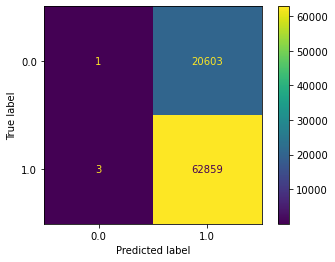

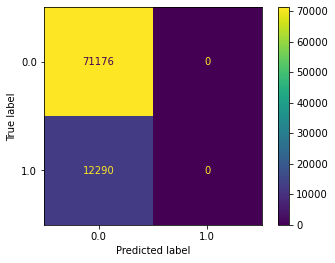

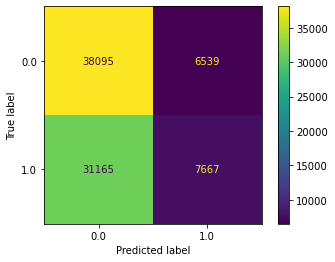

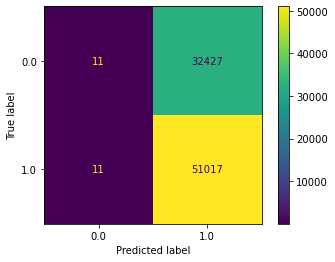

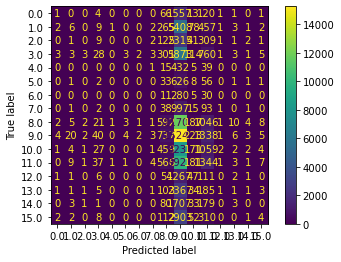

In [7]:
from sklearn.metrics import plot_confusion_matrix

d = [5, 5, 5, 5, 10]
f = [10, 3, 3, 10, 3]
c = ['gini', 'gini', 'gini', 'gini', 'entropy']


for i in range(5):
    clf = RandomForestClassifier(max_depth=d[i],
                                 max_features=f[i],
                                 criterion=c[i],
                                 n_estimators=5).fit(train_X, train_y[i])
    plot_confusion_matrix(clf, test_X, test_y[i])